<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Seminar #1: Inroduction into Time Series Analysis

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

###### <h3> Plan </h3>
  * **Remind: Regression**
  * **Autoregression Model**
  * **HW** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sc

%matplotlib inline

<h1 align="center"> Autoregression</h1>

## Data: energy consumption

In [2]:
# Caution: different version of pandas needs differnt codes!!!
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal='.', parse_dates=True, dayfirst=False, index_col='Dates') 
ts.head(5)

,EnergyCons,Dev,WeekDay
Dates,,,
2005-01-01 00:00:00,1290,-11,6
2005-01-01 01:00:00,1266,-12,6
2005-01-01 02:00:00,1273,-13,6
2005-01-01 03:00:00,1280,-14,6
2005-01-01 04:00:00,1293,-15,6


<h1 align="center"> Home Work 0</h1>

## Answer to questions 
  ** 1. What is time series? **
     
     Time series is a a sequense of values of some variable, detected in a constant time interval.
       
  ** 2. What is delay and horizon of forecast?**
  
 Let's call the data, which we use to make the prediction "train data".
 
 Horizon is a period of past time over which we collect train data.
 
 Delay is an interval between the time of prediction and the last time of train data.
         
  ** 3. What is Least Squared Method for Linear Regression?**
  
Least Squared Method is a method of finding the best coefficients (weights) of Linear Regression by minimization of loss function written as sum of squared errors. I.e.
     
If $x_i$ is the vector of features of $i$-th example. $y_i$ is the true value of $i$-th example. In LSM we minimize the follow function:

$$
L=\sum_i\left(\left(\alpha^Tx_i\right)^2-y^2_i\right)\rightarrow min_\alpha
$$

and find vector of weights $\alpha$

  ** 4. What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? **

The solution is:

$$
\alpha=\left(X^TX\right)^{-1}X^TY
$$

where $X$ is the matrix of features, $Y$ is the vector of true values.
          
  ** 5. Write down main problems of LS method. **
  
1. LS method doesn't work if $\left(X^TX\right)^{-1}$ is a singular  matrix: $det\left(X^TX\right)=0$
2. Weights are constant and doesn't depend on relations between features, which may be important. Sometimes (but not allways) we can solve this problem by adding different relations between features as new features.
3. In case of TS LS method doesn't take into account seasonality. E.g. if in electricity consumption problem delay is 6 months, horizon is a week, linear combination of summer week need to be more than average (because we predict winter consumption), and wise versa linear combination of winter week need to be less than average, but it's inpossible due to same weights.

          
  ** 6. What hankel transformation of a matrix? **
  
Hankel transformation is the transformation of two vector to matrix in which:

1. each element is equal to the element of the previous column of the next row
2. first column is the first vector, last row is the second vector (last element of the first vector need to be equal to first element of the second vector)          

## Practical Task
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting. You should write code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors fo LR in experiment as much as you want.   

In [3]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], x[-K:])
    y = x[K+h-1:]
    return X,y

In [4]:
from IPython import display
import time
fixed=168
changing=721

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-04-30 00:00:00']

start=time.time()

score1=[]
for i in range(1,changing):
    print(i)
    X_train, y_train = get_autoregrmatrix(x_train,i,fixed)
    X_test, y_test = get_autoregrmatrix(x_test,i,fixed)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train,y_train)
    score1.append(linear_regression.score(X_test, y_test))
    display.clear_output(wait=True)
    print("ETA: "+str((time.time()-start)*(changing-i)/(i*60.0))+" min")

print("Total time: "+str((time.time()-start)/60.0)+" min")

ETA: 0.00264501659407 min
Total time: 1.90442016522 min


In [5]:
score2=[]
for i in range(1,changing):
    print(i)
    X_train, y_train = get_autoregrmatrix(x_train,1,i)
    X_test, y_test = get_autoregrmatrix(x_test,1,i)
    linear_regression = LinearRegression()
    linear_regression.fit(X_train,y_train)
    score2.append(linear_regression.score(X_test, y_test))
    display.clear_output(wait=True)
    print("ETA: "+str((time.time()-start)*(changing-i)/(i*60.0))+" min")

print("Total time: "+str((time.time()-start)/60.0)+" min")

ETA: 0.0090060923828 min
Total time: 6.48439551592 min


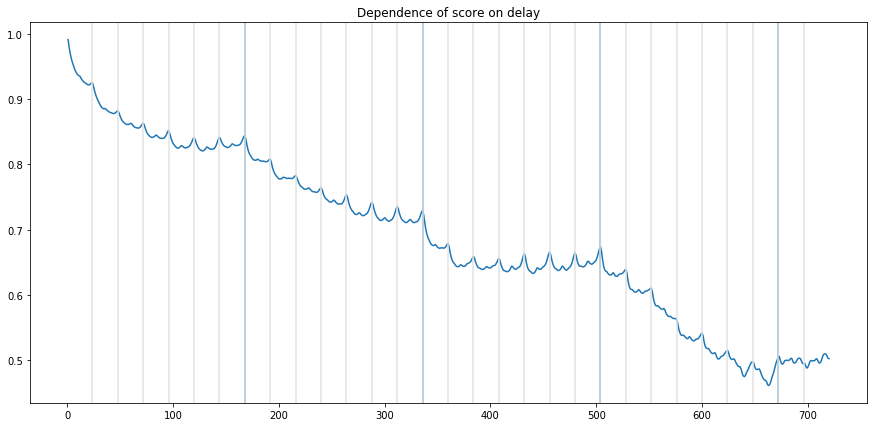

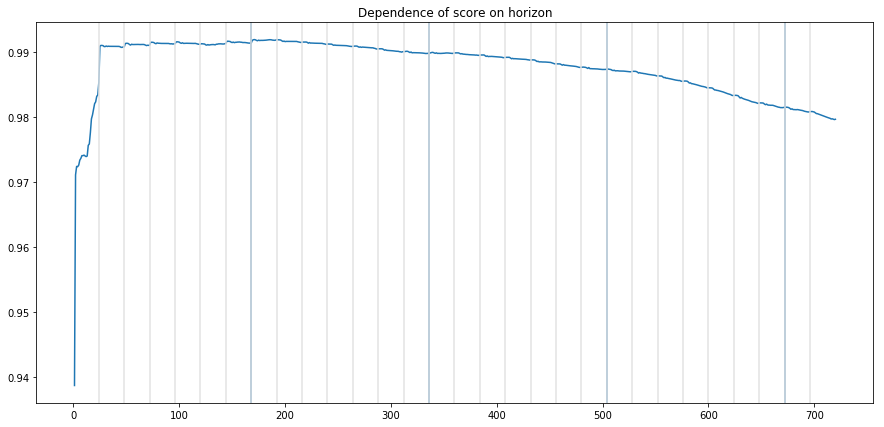

In [7]:
plt.figure(figsize=(15,7))
plt.plot(range(1,changing),score1)

for i in range(1,5):
    plt.axvline(x=168*i)
    
for i in range(1,30):
    plt.axvline(x=24*i, c='30')
    
plt.title("Dependence of score on delay")
plt.show()

plt.figure(figsize=(15,7))
plt.plot(range(1,changing),score2)

for i in range(1,5):
    plt.axvline(x=168*i)
    
for i in range(1,30):
    plt.axvline(x=24*i, c='30')
    
plt.title("Dependence of score on horizon")
plt.show()

# Report:

1. Accuracy goes down with delay increasing
2. Accuracy sharply rise with horizon increasing until few days, then slow goes down
3. There is double-level slow periodicity with a periods of a week and a day